<a href="https://colab.research.google.com/github/Ahauya/Data-Science-projects/blob/main/Loan_approval_Prediction_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn import svm
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score

In [ ]:
from google.colab import files
loan_data =  files.upload()
loan_data = pd.read_csv ("loan_dataset.csv")

Saving loan_dataset.csv to loan_dataset (3).csv


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data =loan_data.dropna()

In [ ]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Converting Text Data into Numerical

In [ ]:
loan_data.replace({"Loan_Status":{"N":0,"Y":1}}, inplace= True)


In [ ]:
loan_data.replace({"Married":{"No":0,"Yes":1}, "Gender": {"Male":0, "Female":1}, "Self_Employed":{"No":0,"Yes":1},
                  "Property_Area":{"Rural":0, "Urban":1, "Semiurban":2}, "Education":{"Graduate":0, "Not Graduate":1}},inplace= True)

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
loan_data["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

Replacing Value

In [ ]:
loan_data = loan_data.replace(to_replace ="3+", value =4)

In [ ]:
loan_data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

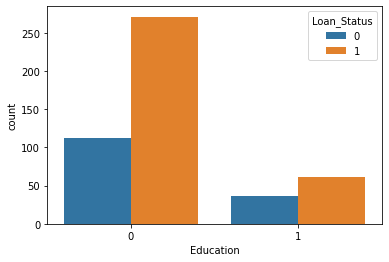

In [ ]:
sns.countplot(x="Education", hue ="Loan_Status", data= loan_data)

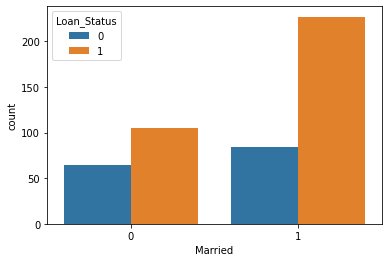

In [ ]:
sns.countplot(x="Married", hue ="Loan_Status", data= loan_data)

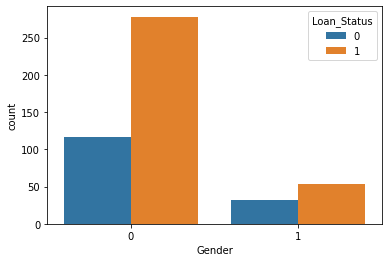

In [ ]:
sns.countplot(x="Gender", hue ="Loan_Status", data= loan_data)

In [ ]:
X= loan_data.drop(columns=["Loan_ID", "Loan_Status"], axis=1)
Y = loan_data ["Loan_Status"]

In [ ]:
print (X)
print (Y)

     Gender  Married  ... Credit_History  Property_Area
1         0        1  ...            1.0              0
2         0        1  ...            1.0              1
3         0        1  ...            1.0              1
4         0        0  ...            1.0              1
5         0        1  ...            1.0              1
..      ...      ...  ...            ...            ...
609       1        0  ...            1.0              0
610       0        1  ...            1.0              0
611       0        1  ...            1.0              1
612       0        1  ...            1.0              1
613       1        0  ...            0.0              2

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Data Slipting 

In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size =0.1, stratify =Y ,random_state =2)

In [ ]:
print (X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Model Training 

In [ ]:
classifier = svm.SVC(kernel="linear")

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
X_train_pred = classifier.predict(X_train)
training_data_accuracy =accuracy_score(X_train_pred,Y_train)

In [ ]:
print ("Accuracy of the Traning Data: ",training_data_accuracy)

Accuracy of the Traning Data:  0.7731481481481481


In [ ]:
X_test_pred = classifier.predict(X_test)
test_data_accuracy =accuracy_score(X_test_pred,Y_test)

In [ ]:
print ("Accuracy of the Traning Data: ",test_data_accuracy)

Accuracy of the Traning Data:  0.8333333333333334
